# MPI Grep Homework

This is my parallel implementation of the `grep` program using [MPI](https://www.open-mpi.org/).

## Notebook initial configuration

In [22]:
%mkdir tmp
%mkdir outputs
%mkdir dest

A subdirectory or file tmp already exists.
A subdirectory or file outputs already exists.
A subdirectory or file dest already exists.


In [1]:
import os

def diff(file1: str, file2: str, verbose: bool = True) -> bool:
    """Compare two files and return if they are different. 
    If verbose then print the line where the difference occurs.

    Args:
        file1 (str): The first file.
        file2 (str): The second file.
        verbose (bool, optional): Set to True to print useful information. Defaults to True.

    Returns:
        bool: True if the two file are different, False otherwise.
    """
    is_diff = False
    if os.path.getsize(file1) == os.path.getsize(file1):
        with open(file1) as f1, open(file2) as f2:
            for i, (x, y) in enumerate(zip(f1, f2)):
                x = x.rstrip()
                y = y.rstrip()
                if x != y:
                    is_diff = True
                    if verbose:
                        print(f"Line {i+1} is different!")

        if verbose and not is_diff:
            print("There are no differences in the two files.")
    else:
        print("The two files have different sizes so they are different!")
    return is_diff


def print_file(file: str) -> None:
    """Print the content of a txt file.

    Args:
        file (str): The file.
    """
    with open(file, "r") as f:
        for l in f:
            print(l.rstrip())


## The file to be searched

In [24]:
%%writefile input_file.txt
There was something special about this little creature. Donna couldn't quite
pinpoint what it was, but she knew with all her heart that it was true. It
wasn't a matter of if she was going to try and save it, but a matter of how she
was going to save it. She went back to the car to get a blanket and when she
returned the creature was gone.  After hunting for several hours, we finally saw
a large seal sunning itself on a flat rock. I took one of the wooden clubs while
Larry took the longer one. We slowly snuck up behind the seal until we were
close enough to club it over its head. The seal slumped over and died. This seal
would help us survive. We could eat the meat and fat. The fat could be burned in
a shell for light and the fur could be used to make a blanket. We declared our
first day of hunting a great success.  Love isn't always a ray of sunshine.
That's what the older girls kept telling her when she said she had found the
perfect man. She had thought this was simply bitter talk on their part since
they had been unable to find true love like hers. But now she had to face the
fact that they may have been right. Love may not always be a ray of sunshine.
That is unless they were referring to how the sun can burn.  She was infatuated
with color. She didn't have a favorite color per se, but she did have a fondness
for teals and sea greens. You could see it in the clothes she wore that color
was an important part of her overall style. She took great pride that color
flowed from her and that color was always all around her. That is why, she
explained to her date sitting across the table, that she could never have a
serious relationship with him due to the fact that he was colorblind.  "Can I
get you anything else?" David asked. It was a question he asked a hundred times
a day and he always received the same answer. It had become such an ingrained
part of his daily routine that he had to step back and actively think when he
heard the little girl's reply. Nobody had before answered the question the way
that she did, and David didn't know how he should respond.  It was supposed to
be a dream vacation. They had planned it over a year in advance so that it would
be perfect in every way. It had been what they had been looking forward to
through all the turmoil and negativity around them. It had been the light at the
end of both their tunnels. Now that the dream vacation was only a week away, the
virus had stopped all air travel.  He swung back the fishing pole and cast the
line which ell 25 feet away into the river. The lure landed in the perfect spot
and he was sure he would soon get a bite. He never expected that the bite would
come from behind in the form of a bear.  The time to take action was now. All
three men knew in their hearts this was the case, yet none of them moved a
muscle to try. They were all watching and waiting for one of the others to make
the first move so they could follow a step or two behind and help. The situation
demanded a leader and all three men were followers.  He wondered if he should
disclose the truth to his friends. It would be a risky move. Yes, the truth
would make things a lot easier if they all stayed on the same page, but the
truth might fracture the group leaving everything in even more of a mess than it
was not telling the truth. It was time to decide which way to go.  The wolves
stopped in their tracks, sizing up the mother and her cubs. It had been over a
week since their last meal and they were getting desperate. The cubs would make
a good meal, but there were high risks taking on the mother Grizzly. A decision
had to be made and the wrong choice could signal the end of the pack.  There
were little things that she simply could not stand. The sound of someone tapping
their nails on the table. A person chewing with their mouth open. Another human
imposing themselves into her space. She couldn't stand any of these things, but
none of them compared to the number one thing she couldn't stand which topped
all of them combined.  It all started with the computer. Had he known what was
to follow, he would have never logged on that day. But the truth was there was
no way to know what was about to happen. So Dave pressed the start button, the
computer booted up, the screen came alive, and everything Dave knew to be true
no longer was.  The water rush down the wash and into the slot canyon below. Two
hikers had started the day to sunny weather without a cloud in the sky, but they
hadn't thought to check the weather north of the canyon. Huge thunderstorms had
brought a deluge o rain and produced flash floods heading their way. The two
hikers had no idea what was coming.  It was a simple green chair. There was
nothing extraordinary about it or so it seemed. It was the type of chair one
would pass without even noticing it was there, let alone what the actual color
of it was. It was due to this common and unassuming appearance that few people
actually stopped to sit in it and discover its magical powers.  Lori lived her
life through the lens of a camera. She never realized this until this very
moment as she scrolled through thousands of images on your computer. She could
remember the exact moment each photo was taken. She could remember where she had
been, what she was thinking as she tried to get the shot, the smells of the
surrounding area, and even the emotions that she felt taking the photo, yet she
had trouble remembering what she had for breakfast.  Twenty-five years Dana had
been waiting. She tried to be patient during that time but she hadn't always
managed to be as patient as she'd like. But today the opportunity had finally
come. The thing she always imagined would make her the happiest person in the
world was about to happen. She didn't know why at this specific time she all of
a sudden felt sick inside.  Devon couldn't figure out the color of her eyes. He
initially would have guessed that they were green, but the more he looked at
them he almost wanted to say they were a golden yellow. Then there were the
flashes of red and orange that seemed to be streaked throughout them. It was
almost as if her eyes were made of opal with the sun constantly glinting off of
them and bringing out more color. They were definitely the most unusual pair of
eyes he'd ever seen.  Her mom had warned her. She had been warned time and
again, but she had refused to believe her. She had done everything right and she
knew she would be rewarded for doing so with the promotion. So when the
promotion was given to her main rival, it not only stung, it threw her belief
system into disarray. It was her first big lesson in life, but not the last.
Then came the night of the first falling star. It was seen early in the morning,
rushing over Winchester eastward, a line of flame high in the atmosphere.
Hundreds must have seen it and taken it for an ordinary falling star. It seemed
that it fell to earth about one hundred miles east of him.  It was a simple tip
of the hat. Grace didn't think that anyone else besides her had even noticed it.
It wasn't anything that the average person would notice, let alone remember at
the end of the day. That's why it seemed so unbelievable that this little
gesture would ultimately change the course of the world.  She tried to explain
that love wasn't like pie. There wasn't a set number of slices to be given out.
There wasn't less to be given to one person if you wanted to give more to
another. That after a set amount was given out it would all disappear. She tried
to explain this, but it fell on deaf ears.  I love the feel of wood curls flying
off the lathe as I begin to shape the log in front of me. The sound of scraping
changes based on the wetness of the wood, the speed at which the lathe is
turning, and the type of cut I am making. The smell and feel of wet wood being
turned are unique. The water is sprayed out as I cut through the different
layers of wood. A log can turn into anything one's imagination can think of with
the right set of hands-on tools. I have those hands and imagination. I use all
of my senses and intuition to create a beautiful object. That is why I enjoy
turning wood.  My pincher collar is snapped on. Then comes the electric zapper
collar. Finally, my purple at-home collar is taken off and I know Im going for
a walk to the dog park. Im so excited to see my friends. I hope Spike or
Thunder are there already. They're the most fun to chase and tumble with. My
human is pretty strict with me. Im only allowed on the grass and not on the
sidewalks. I think shes afraid Im going to jump on the other humans. I dont
understand why everyone else gets to jump on the benches and run wild on the
sidewalks. They dont listen to their humans. I know I could ignore mine but if
I do she may zap me and its just not worth it. She probably wouldnt let me
back at the dog park if I didnt listen to her. I just love the dog park.  The
clowns had taken over. And yes, they were literally clowns. Over 100 had
appeared out of a small VW bug that had been driven up to the bank. Now they
were all inside and had taken it over.  She's asked the question so many times
that she barely listened to the answers anymore. The answers were always the
same. Well, not exactly the same, but the same in a general sense. A more
accurate description was the answers never surprised her. So, she asked for the
10,000th time, "What's your favorite animal?" But this time was different. When
she heard the young boy's answer, she wondered if she had heard him correctly.
Sitting in the sun, away from everyone who had done him harm in the past, he
quietly listened to those who roamed by. He felt at peace in the moment, hoping
it would last, but knowing the reprieve would soon come to an end. He closed his
eyes, the sun beating down on face and he smiled. He smiled for the first time
in as long as he could remember.  There were only two ways to get out of this
mess if they all worked together. The problem was that neither was all that
appealing. One would likely cause everyone a huge amount of physical pain while
the other would likely end up with everyone in jail. In Sam's mind, there was
only one thing to do. He threw everyone else under the bus and he secretly
sprinted away leaving the others to take the fall without him.  The red glow of
tail lights indicating another long drive home from work after an even longer
24-hour shift at the hospital. The shift hadnt been horrible but the constant
stream of patients entering the ER meant there was no downtime. She had some of
the regulars in tonight with new ailments they were sure were going to kill
them. Its amazing what a couple of Tylenol and a physical exam from the doctor
did to eliminate their pain, nausea, headache, or whatever other mild symptoms
they had. Sometimes she wondered if all they really needed was some interaction
with others and a bit of the individual attention they received from the nurses.
Dave wasn't exactly sure how he had ended up in this predicament. He ran through
all the events that had lead to this current situation and it still didn't make
sense. He wanted to spend some time to try and make sense of it all, but he had
higher priorities at the moment. The first was how to get out of his current
situation of being naked in a tree with snow falling all around and no way for
him to get down.  She glanced up into the sky to watch the clouds taking shape.
First, she saw a dog. Next, it was an elephant. Finally, she saw a giant
umbrella and at that moment the rain began to pour.  It was a good idea. At
least, they all thought it was a good idea at the time. Hindsight would reveal
that in reality, it was an unbelievably terrible idea, but it would take another
week for them to understand that. Right now, at this very moment. they all
agreed that it was the perfect course of action for the current situation.
"It's never good to give them details," Janice told her sister. "Always be a
little vague and keep them guessing." Her sister listened intently and nodded in
agreement. She didn't fully understand what her sister was saying but that
didn't matter. She loved her so much that she would have agreed to whatever came
out of her mouth.  He had three simple rules by which he lived. The first was to
never eat blue food. There was nothing in nature that was edible that was blue.
People often asked about blueberries, but everyone knows those are actually
purple. He understood it was one of the stranger rules to live by, but it had
served him well thus far in the 50+ years of his life.  There were about twenty
people on the dam. Most of them were simply walking and getting exercise. There
were a few who were fishing. There was a family who had laid down a blanket and
they were having a picnic. It was like this most days and nothing seemed out of
the ordinary. The problem was that nobody noticed the water leaking through the
dam wall.  Sometimes it just doesn't make sense. The man walking down the street
in a banana suit. The llama standing in the middle of the road. The fairies
dancing in front of the car window. The fact that all of this was actually
happening and wasn't a dream.  The piano sat silently in the corner of the room.
Nobody could remember the last time it had been played. The little girl walked
up to it and hit a few of the keys. The sound of the piano rang throughout the
house for the first time in years. In the upstairs room, confined to her bed,
the owner of the house had tears in her eyes.  The headphones were on. They had
been utilized on purpose. She could hear her mom yelling in the background, but
couldn't make out exactly what the yelling was about. That was exactly why she
had put them on. She knew her mom would enter her room at any minute, and she
could pretend that she hadn't heard any of the previous yelling.  The shades
were closed keeping the room dark. Peter knew that he should open them and let
in the sunlight so he could begin the day, but he didn't have the energy or
willpower. Nothing had gone as expected the day before and he no longer wanted
to spend the energy to begin a new day. He stared at the shades wondering if
there was a way to disappear from the reality of the world for the rest of the
day.  No matter how hard he tried, he couldn't give her a good explanation about
what had happened. It didn't even really make sense to him. All he knew was that
he froze at the moment and no matter how hard he tried to react, nothing in his
body allowed him to move. It was as if he had instantly become a statue and
although he could see what was taking place, he couldn't move to intervene. He
knew that wasn't a satisfactory explanation even though it was the truth.  The
shoes had been there for as long as anyone could remember. In fact, it was
difficult for anyone to come up with a date they had first appeared. It had
seemed they'd always been there and yet they seemed so out of place. Why nobody
had removed them was a question that had been asked time and again, but while
they all thought it, nobody had ever found the energy to actually do it. So, the
shoes remained on the steps, out of place in one sense, but perfectly normal in
another.  There was little doubt that the bridge was unsafe. All one had to do
was look at it to know that with certainty. Yet Bob didn't see another option.
He may have been able to work one out if he had a bit of time to think things
through, but time was something he didn't have. A choice needed to be made, and
it needed to be made quickly.  Sarah watched the whirlpool mesmerized. She
couldn't take her eyes off the water swirling around and around. She stuck in
small twigs and leaves to watch the whirlpool catch them and then suck them
down. It bothered her more than a little bit that this could also be used as a
metaphor for her life.  They had made it to Las Vegas, wide-eyed and with so
much hope and energy. They had planned the trip for more than a year and both
were so excited they could barely control themselves. They still hadn't realized
that Las Vegas promised a place where dreams come true, it was actually the
place where dreams came to die.  Twenty-five hours had passed since the
incident. It seemed to be a lot longer than that. That twenty-five hours seemed
more like a week in her mind. The fact that she still was having trouble
comprehending exactly what took place wasn't helping the matter. She thought if
she could just get a little rest the entire incident might make a little more
sense.  He dropped the ball. While most people would think that this was a
metaphor of some type, in Joe's case it was absolutely literal. He had hopes of
reaching the Major League and that dream was now it great jeopardy. All because
he had dropped the ball.  He knew what he was supposed to do. That had been
apparent from the beginning. That was what made the choice so difficult. What he
was supposed to do and what he would do were not the same. This would have been
fine if he were willing to face the inevitable consequences, but he wasn't.  He
wandered down the stairs and into the basement. The damp, musty smell of unuse
hung in the air. A single, small window let in a glimmer of light, but this
simply made the shadows in the basement deeper. He inhaled deeply and looked
around at a mess that had been accumulating for over 25 years. He was positive
that this was the place he wanted to live.  It was the best compliment that he'd
ever received although the person who gave it likely never knew. It had been an
off-hand observation on his ability to hold a conversation and actually add
pertinent information to it on practically any topic. Although he hadn't
consciously strived to be able to do so, he'd started to voraciously read the
news when he couldn't keep up on topics his friends discussed because their
conversations went above his head. The fact that someone had noticed enough to
compliment him that he could talk intelligently about many topics meant that he
had succeeded in his quest to be better informed.  The red line moved across the
page. With each millimeter it advanced forward, something changed in the room.
The actual change taking place was difficult to perceive, but the change was
real. The red line continued relentlessly across the page and the room would
never be the same.  She patiently waited for his number to be called. She had no
desire to be there, but her mom had insisted that she go. She's resisted at
first, but over time she realized it was simply easier to appease her and go.
Mom tended to be that way. She would keep insisting until you wore down and did
what she wanted. So, here she sat, patiently waiting for her number to be
called. Things aren't going well at all with mom today. She is just a limp
noodle and wants to sleep all the time. I sure hope that things get better soon.
They rushed out the door, grabbing anything and everything they could think of
they might need. There was no time to double-check to make sure they weren't
leaving something important behind. Everything was thrown into the car and they
sped off. Thirty minutes later they were safe and that was when it dawned on
them that they had forgotten the most important thing of all.  Although Scott
said it didn't matter to him, he knew deep inside that it did. They had been
friends as long as he could remember and not once had he had to protest that
something Joe apologized for doing didn't really matter. Scott stuck to his lie
and insisted again and again that everything was fine as Joe continued to
apologize. Scott already knew that despite his words accepting the apologies
that their friendship would never be the same.  Sarah watched the whirlpool
mesmerized. She couldn't take her eyes off the water swirling around and around.
She stuck in small twigs and leaves to watch the whirlpool catch them and then
suck them down. It bothered her more than a little bit that this could also be
used as a metaphor for her life.  Betty decided to write a short story and she
was sure it was going to be amazing. She had already written it in her head and
each time she thought about it she grinned from ear to ear knowing how wonderful
it would be. She could imagine the accolades coming in and the praise she would
receive for creating such a wonderful piece. She was therefore extremely
frustrated when she actually sat down to write the short story and the story
that was so beautiful inside her head refused to come out that way on paper.
She was infatuated with color. She didn't have a favorite color per se, but she
did have a fondness for teals and sea greens. You could see it in the clothes
she wore that color was an important part of her overall style. She took great
pride that color flowed from her and that color was always all around her. That
is why, she explained to her date sitting across the table, that she could never
have a serious relationship with him due to the fact that he was colorblind.
She didn't understand how changed worked. When she looked at today compared to
yesterday, there was nothing that she could see that was different. Yet, when
she looked at today compared to last year, she couldn't see how anything was
ever the same.  Stranded. Yes, she was now the first person ever to land on
Venus, but that was of little consequence. Her name would be read by millions in
school as the first to land here, but that celebrity would never actually be
seen by her. She looked at the control panel and knew there was nothing that
would ever get it back into working order. She was the first and it was not
clear this would also be her last.  There wasn't a whole lot he could do at that
moment. He played the situation again and again in his head looking at what he
might have done differently to make the situation better. No matter how many
times he relived the situation in his head, there was never really a good
alternative course of action. There simply wasn't a whole lot he could have done
in that particular moment.  There was a time when he would have embraced the
change that was coming. In his youth, he sought adventure and the unknown, but
that had been years ago. He wished he could go back and learn to find the
excitement that came with change but it was useless. That curiosity had long
left him to where he had come to loathe anything that put him out of his comfort
zone.  She looked at her student wondering if she could ever get through. "You
need to learn to think for yourself," she wanted to tell him. "Your friends are
holding you back and bringing you down." But she didn't because she knew his
friends were all that he had and even if that meant a life of misery, he would
never give them up.  Spending time at national parks can be an exciting
adventure, but this wasn't the type of excitement she was hoping to experience.
As she contemplated the situation she found herself in, she knew she'd gotten
herself in a little more than she bargained for. It wasn't often that she found
herself in a tree staring down at a pack of wolves that were looking to make her
their next meal.  There had to be a better way. That's all Nancy could think as
she sat at her desk staring at her computer screen. She'd already spent five
years of her life in this little cubicle staring at her computer doing "work"
that didn't seem to matter to anyone including her own boss. There had to be
more to her life than this and there had to be a better way to make a living.
That's what she was thinking when the earthquake struck.  It really doesn't
matter what she thinks as it isn't her problem to solve. That's what he kept
trying to convince himself. She was trying to insert her opinion where it wasn't
wanted or welcome. He already had a plan and even though that plan didn't
correspond with what she wanted him to do or what should be done, it wasn't her
decision to make. The question now became whether he would stick to his
convictions and go through with his plan knowing she wouldn't approve.  Since
they are still preserved in the rocks for us to see, they must have been formed
quite recently, that is, geologically speaking. What can explain these
striations and their common orientation? Did you ever hear about the Great Ice
Age or the Pleistocene Epoch? Less than one million years ago, in fact, some
12,000 years ago, an ice sheet many thousands of feet thick rode over Burke
Mountain in a southeastward direction. The many boulders frozen to the underside
of the ice sheet tended to scratch the rocks over which they rode. The scratches
or striations seen in the park rocks were caused by these attached boulders. The
ice sheet also plucked and rounded Burke Mountain into the shape it possesses
today.  Pink ponies and purple giraffes roamed the field. Cotton candy grew from
the ground as a chocolate river meandered off to the side. What looked like
stones in the pasture were actually rock candy. Everything in her dream seemed
to be perfect except for the fact that she had no mouth.  MaryLou wore the tiara
with pride. There was something that made doing anything she didn't really want
to do a bit easier when she wore it. She really didn't care what those staring
through the window were thinking as she vacuumed her apartment.  She sat down
with her notebook in her hand, her mind wandering to faraway places. She paused
and considered all that had happened. It hadn't gone as expected. When the day
began she thought it was going to be a bad one, but as she sat recalling the
day's events to write them down, she had to admit, it had been a rather
marvelous day.  If you can imagine a furry humanoid seven feet tall, with the
face of an intelligent gorilla and the braincase of a man, you'll have a rough
idea of what they looked like -- except for their teeth. The canines would have
fitted better in the face of a tiger, and showed at the corners of their wide,
thin-lipped mouths, giving them an expression of ferocity.  Mary had to make a
decision and she knew that whatever decision she made, it would upset someone.
It seemed like such a silly reason for people to get upset but she knew the
minute that she began to consider doing it that there was no way everyone in her
life would be pleased with what she ultimately decided to do. It was simply a
question of who she would rather displease most. While this had always been her
parents, and especially her mom, in the past that she tried to keep from
upsetting, she decided that this time the person she was going to please the
most with her decision was herself.  "It was so great to hear from you today and
it was such weird timing," he said. "This is going to sound funny and a little
strange, but you were in a dream I had just a couple of days ago. I'd love to
get together and tell you about it if you're up for a cup of coffee," he
continued, laying the trap he'd been planning for years.  How had she been so
wrong? All her instincts and intuition completely failed her for the first time
in her life. She had so heavily relied on both when making decisions up until
this moment and she felt a seismic shift take place in her self-confidence. If
she could be so completely wrong about something so simple as this, how could
she make decisions about really important things taking place in her life? She
wasn't sure what she should do next.  The house was located at the top of the
hill at the end of a winding road. It wasn't obvious that the house was there,
but everyone in town knew that it existed. They were just all too afraid to ever
go and see it in person.  It's always good to bring a slower friend with you on
a hike. If you happen to come across bears, the whole group doesn't have to
worry. Only the slowest in the group do. That was the lesson they were about to
learn that day.  There was only one way to do things in the Statton house. That
one way was to do exactly what the father, Charlie, demanded. He made the
decisions and everyone else followed without question. That was until today.
I'm meant to be writing at this moment. What I mean is, I'm meant to be writing
something else at this moment. The document I'm meant to be writing is, of
course, open in another program on my computer and is patiently awaiting my
attention. Yet here I am plonking down senseless sentiments in this paragraph
because it's easier to do than to work on anything particularly meaningful. I am
grateful for the distraction.  Debbie had taken George for granted for more than
fifteen years now. He wasn't sure what exactly had made him choose this time and
place to address the issue, but he decided that now was the time. He looked
straight into her eyes and just as she was about to speak, turned away and
walked out the door.  I'm heading back to Colorado tomorrow after being down in
Santa Barbara over the weekend for the festival there. I will be making October
plans once there and will try to arrange so I'm back here for the birthday if
possible. I'll let you know as soon as I know the doctor's appointment schedule
and my flight plans.  The shades were closed keeping the room dark. Peter knew
that he should open them and let in the sunlight so he could begin the day, but
he didn't have the energy or willpower. Nothing had gone as expected the day
before and he no longer wanted to spend the energy to begin a new day. He stared
at the shades wondering if there was a way to disappear from the reality of the
world for the rest of the day.  Dave found joy in the daily routine of life. He
awoke at the same time, ate the same breakfast and drove the same commute. He
worked at a job that never seemed to change and he got home at 6 pm sharp every
night. It was who he had been for the last ten years and he had no idea that was
all about to change.  There was a reason for her shyness. Everyone assumed it
had always been there but she knew better. She knew the exact moment that the
shyness began. It had been that fateful moment at the lake. There are just some
events that do that to you.  Ten more steps. If he could take ten more steps it
would be over, but his legs wouldn't move. He tried to will them to work, but
they wouldn't listen to his brain. Ten more steps and it would be over but it
didn't appear he would be able to do it.  The wave roared towards them with
speed and violence they had not anticipated. They both turned to run but by that
time it was too late. The wave crashed into their legs sweeping both of them off
of their feet. They now found themselves in a washing machine of saltwater,
getting tumbled and not know what was up or down. Both were scared, not knowing
how this was going to end, but it was by far the best time of the trip thus far.
He sat across from her trying to imagine it was the first time. It wasn't. Had
it been a hundred? It quite possibly could have been. Two hundred? Probably not.
His mind wandered until he caught himself and again tried to imagine it was the
first time.  He had disappointed himself more than anyone else. That wasn't to
say that he hadn't disappointed others. The fact was that he had disappointed a
lot of people who were close to him. The fact that they were disappointed in him
was something that made him even more disappointed in himself. Yet here he was,
about to do the exact same things that had caused all the disappointment in the
first place because he didn't know what else to do.  Stormi is a dog. She is
dark grey and has long legs. Her eyes are expressive and are able to let her
humans know what she is thinking. Her tongue is long, pink, and wet. Her long
legs allow her to sprint after other dogs, people or bunnies. She can be a good
dog, but also very bad. Her tail wags when happy or excited and hides between
her back legs when she is bad. Stormi is a dog I love.  He picked up the burnt
end of the branch and made a mark on the stone. Day 52 if the marks on the stone
were accurate. He couldn't be sure. Day and nights had begun to blend together
creating confusion, but he knew it was a long time. Much too long.  The wave
crashed and hit the sandcastle head-on. The sandcastle began to melt under the
waves force and as the wave receded, half the sandcastle was gone. The next wave
hit, not quite as strong, but still managed to cover the remains of the
sandcastle and take more of it away. The third wave, a big one, crashed over the
sandcastle completely covering and engulfing it. When it receded, there was no
trace the sandcastle ever existed and hours of hard work disappeared forever.
It was a scrape that he hardly noticed. Sure, there was a bit of blood but it
was minor compared to most of the other cuts and bruises he acquired on his
adventures. There was no way he could know that the rock that produced the cut
had alien genetic material on it that was now racing through his bloodstream. He
felt perfectly normal and continued his adventure with no knowledge of what was
about to happen to him.  They had no proof. He knew that they knew he had done
it but they didn't have any proof. It was a huge distinction and it was the
difference between him keeping his freedom or being locked away for decades.
They continued to question him, probing him for information that they could use
against him or find the proof they needed to put him away. He smiled and
continued to block their every inquiry by feigning his innocence for a crime
they all knew he committed.  She wanted rainbow hair. That's what she told the
hairdresser. It should be deep rainbow colors, too. She wasn't interested in
pastel rainbow hair. She wanted it deep and vibrant so there was no doubt that
she had done this on purpose.  I recently discovered I could make fudge with
just chocolate chips, sweetened condensed milk, vanilla extract, and a thick pot
on slow heat. I tried it with dark chocolate chunks and I tried it with
semi-sweet chocolate chips. It's better with both kinds. It comes out pretty bad
with just the dark chocolate. The best add-ins are crushed almonds and
marshmallows -- what you get from that is Rocky Road. It takes about twenty
minutes from start to fridge, and then it takes about six months to work off the
twenty pounds you gain from eating it. All things in moderation, friends. All
things in moderation.  There was no ring on his finger. That was a good sign
although far from proof that he was available. Still, it was much better than if
he had been wearing a wedding ring on his hand. She glanced at his hand a bit
more intently to see if there were any tan lines where a ring may have been, and
he's simply taken it off. She couldn't detect any which was also a good sign and
a relief. The next step would be to get access to his wallet to see if there
were any family photos in it.  He heard the loud impact before he ever saw the
result. It had been so loud that it had actually made him jump back in his seat.
As soon as he recovered from the surprise, he saw the crack in the windshield.
It seemed to be an analogy of the current condition of his life.  He walked down
the steps from the train station in a bit of a hurry knowing the secrets in the
briefcase must be secured as quickly as possible. Bounding down the steps, he
heard something behind him and quickly turned in a panic. There was nobody there
but a pair of old worn-out shoes were placed neatly on the steps he had just
come down. Had he past them without seeing them? It didn't seem possible. He was
about to turn and be on his way when a deep chill filled his body.  The river
slowly meandered through the open space. It had hidden secrets that it didn't
want to reveal. It had a well-planned strategy to appear calm, inviting, and
appealing. That's how the river lured her unknowing victims to her water's edge.
My pincher collar is snapped on. Then comes the electric zapper collar. Finally,
my purple at-home collar is taken off and I know Im going for a walk to the dog
park. Im so excited to see my friends. I hope Spike or Thunder are there
already. They're the most fun to chase and tumble with. My human is pretty
strict with me. Im only allowed on the grass and not on the sidewalks. I think
shes afraid Im going to jump on the other humans. I dont understand why
everyone else gets to jump on the benches and run wild on the sidewalks. They
dont listen to their humans. I know I could ignore mine but if I do she may zap
me and its just not worth it. She probably wouldnt let me back at the dog park
if I didnt listen to her. I just love the dog park.  There was only half a worm
in the apple. At first, Judy didn't quite comprehend what this meant. "Why would
only half a worm be living in an apple?" she wondered. And then it dawned on
her. Judy quickly spit out the bite she had just taken expecting to see the
other half of the worm. It ended up being much worse than that.  Benny was
tired. Not the normal every day tired from a hard day o work. The exhausted type
of tired where you're surprised your body can even move. All he wanted to do was
sit in front of the TV, put his feet up on the coffee table, and drink a beer.
The only issue was that he had forgotten where he lived.  The blinking light
caught her attention. She thought about it a bit and couldn't remember ever
noticing it before. That was strange since it was obvious the flashing light had
been there for years. Now she wondered how she missed it for that amount of time
and what other things in her small town she had failed to notice. Here's the
thing. She doesn't have anything to prove, but she is going to anyway. That's
just her character. She knows she doesn't have to, but she still will just to
show you that she can. Doubt her more and she'll prove she can again. We all
already know this and you will too.  Housework could be everyones work, not
just womens work. Why do women enable men to act oblivious to cleaning,
grocery shopping, pet feeding, etc? Somehow when men live alone they figure out
how to do all of those things all on their own. My friends husband claimed he
didnt know that sheets should be washed more than once a season. He said he
didnt know one had to clean toilets. He assumed that since you flush toilets
they clean themselves. She tried to get him to help but he did an awful job so
she let him off the hook. Wouldnt it be better if she spent the time and energy
to get him to do it right instead of letting him claim he is just bad at it.
My sons were raised to clean toilets and change their own sheets. Hopefully, in
their future homes, the housework will be equally divided.  The fog was as thick
as pea soup. This was a problem. Gary was driving but couldn't see a thing in
front of him. He knew he should stop, but the road was narrow so if he did, it
would be right in the center of the road. He was sure that another car would end
up rear-ending him, so he continued forward despite the lack of visibility. This
was an unwise move.  The coin hovered in the air, spinning over and over again.
It reached its peak and began to descend. Both boys were pleading with it to
land a certain way but the coin had already made up its mind on what it was
going to do.  With six children in tow, Catherine raced to the airport departing
gate. This wasn't an easy task as the children had other priorities than to get
to the gate. She knew that she was tight on time and the frustration came out as
she yelled at the kids to keep up. They continued to test her, pretending not to
listen and to move in directions that only slowed them down. They had no idea
the wrath they were about to receive when Catherine made it to the gate only to
be informed that they had all missed the plane.  She had come to the conclusion
that you could tell a lot about a person by their ears. The way they stuck out
and the size of the earlobes could give you wonderful insights into the person.
Of course, she couldn't scientifically prove any of this, but that didn't matter
to her. Before anything else, she would size up the ears of the person she was
talking to.  The shades were closed keeping the room dark. Peter knew that he
should open them and let in the sunlight so he could begin the day, but he
didn't have the energy or willpower. Nothing had gone as expected the day before
and he no longer wanted to spend the energy to begin a new day. He stared at the
shades wondering if there was a way to disappear from the reality of the world
for the rest of the day.  Indescribable oppression, which seemed to generate in
some unfamiliar part of her consciousness, filled her whole being with a vague
anguish. It was like a shadow, like a mist passing across her soul's summer day.
It was strange and unfamiliar; it was a mood. She did not sit there inwardly
upbraiding her husband, lamenting at Fate, which had directed her footsteps to
the path which they had taken. She was just having a good cry all to herself.
The mosquitoes made merry over her, biting her firm, round arms and nipping at
her bare insteps.  Spending time at national parks can be an exciting adventure,
but this wasn't the type of excitement she was hoping to experience. As she
contemplated the situation she found herself in, she knew she'd gotten herself
in a little more than she bargained for. It wasn't often that she found herself
in a tree staring down at a pack of wolves that were looking to make her their
next meal.  His mother had always taught him not to ever think of himself as
better than others. He'd tried to live by this motto. He never looked down on
those who were less fortunate or who had less money than him. But the stupidity
of the group of people he was talking to made him change his mind.  There was
only half a worm in the apple. At first, Judy didn't quite comprehend what this
meant. "Why would only half a worm be living in an apple?" she wondered. And
then it dawned on her. Judy quickly spit out the bite she had just taken
expecting to see the other half of the worm. It ended up being much worse than
that.  Do you think you're living an ordinary life? You are so mistaken it's
difficult to even explain. The mere fact that you exist makes you extraordinary.
The odds of you existing are less than winning the lottery, but here you are.
Are you going to let this extraordinary opportunity pass?  She wondered if the
note had reached him. She scolded herself for not handing it to him in person.
She trusted her friend, but so much could happen. She waited impatiently for
word.  It had been a rough day. Things hadn't gone as planned and that meant
Hannah got yelled at by her boss. It didn't even matter that it wasn't her
fault. When things went wrong at work, Hannah got the blame no matter the actual
circumstances. It wasn't fair, but there was little she could do without risking
her job, and she wasn't in a position to do that with the plans she had.  Then
came the night of the first falling star. It was seen early in the morning,
rushing over Winchester eastward, a line of flame high in the atmosphere.
Hundreds must have seen it and taken it for an ordinary falling star. It seemed
that it fell to earth about one hundred miles east of him.  Debbie had taken
George for granted for more than fifteen years now. He wasn't sure what exactly
had made him choose this time and place to address the issue, but he decided
that now was the time. He looked straight into her eyes and just as she was
about to speak, turned away and walked out the door.  Frank knew there was a
correct time and place to reveal his secret and this wasn't it. The issue was
that the secret might be revealed despite his best attempt to keep it from
coming out. At this point, it was out of his control and completely dependant on
those around him who also knew the secret. They wouldn't purposely reveal it, or
at least he believed that, but they could easily inadvertently expose it. It was
going to be a long hour as he nervously eyed everyone around the table hoping
they would keep their mouths shut.  It was their first date and she had been
looking forward to it the entire week. She had her eyes on him for months, and
it had taken a convoluted scheme with several friends to make it happen, but
he'd finally taken the hint and asked her out. After all the time and effort
she'd invested into it, she never thought that it would be anything but
wonderful. It goes without saying that things didn't work out quite as she
expected.  It was going to rain. The weather forecast didn't say that, but the
steel plate in his hip did. He had learned over the years to trust his hip over
the weatherman. It was going to rain, so he better get outside and prepare.  She
was infatuated with color. She didn't have a favorite color per se, but she did
have a fondness for teals and sea greens. You could see it in the clothes she
wore that color was an important part of her overall style. She took great pride
that color flowed from her and that color was always all around her. That is
why, she explained to her date sitting across the table, that she could never
have a serious relationship with him due to the fact that he was colorblind.
You know that tingly feeling you get on the back of your neck sometimes? I just
got that feeling when talking with her. You know I don't believe in sixth
senses, but there is something not right with her. I don't know how I know, but
I just do.  The light blinded him. It was dark and he thought he was the only
one in the area, but the light shining in his eyes proved him wrong. It came
from about 100 feet away and was shining so directly into his eyes he couldn't
make out anything about the person holding the light. There was only one thing
to do in this situation. He reached into his pocket and pulled out a flashlight
of his own that was much stronger than the one currently blinding him. He turned
it on and pointed it into the stranger's eyes.  It had been a simple realization
that had changed Debra's life perspective. It was really so simple that she was
embarrassed that she had lived the previous five years with the way she measured
her worth. Now that she saw what she had been doing, she could see how sad it
was. That made her all the more relieved she had made the change. The number of
hearts her Instagram posts received wasn't any longer the indication of her own
self-worth.  It was difficult for him to admit he was wrong. He had been so
certain that he was correct and the deeply held belief could never be shaken.
Yet the proof that he had been incorrect stood right before his eyes. "See
daddy, I told you that they are real!" his daughter excitedly proclaimed.  Life
isn't always beautiful. That was a lesson that Dan was learning. He also
realized that life wasn't easy. This had come as a shock since he had lived a
charmed life. He hated that this was the truth and he struggled to be happy
knowing that his assumptions weren't correct. He wouldn't realize until much
later in life that the difficult obstacles he was facing that were taking away
the beauty in his life at this moment would ultimately make his life much more
beautiful. All he knew was that at this moment was that life isn't always
beautiful.  It was that terrifying feeling you have as you tightly hold the
covers over you with the knowledge that there is something hiding under your
bed. You want to look, but you don't at the same time. You're frozen with fear
and unable to act. That's where she found herself and she didn't know what to do
next He slowly poured the drink over a large chunk of ice he has especially
chiseled off a larger block. He didn't particularly like his drinks cold, but he
knew that the drama of chiseling the ice and then pouring a drink over it looked
far more impressive than how he actually liked it. It was all about image and
he'd managed to perfect the image that he wanted to project.  Devon couldn't
figure out the color of her eyes. He initially would have guessed that they were
green, but the more he looked at them he almost wanted to say they were a golden
yellow. Then there were the flashes of red and orange that seemed to be streaked
throughout them. It was almost as if her eyes were made of opal with the sun
constantly glinting off of them and bringing out more color. They were
definitely the most unusual pair of eyes he'd ever seen.  Sometimes it's simply
better to ignore the haters. That's the lesson that Tom's dad had been trying to
teach him, but Tom still couldn't let it go. He latched onto them and their hate
and couldn't let it go, but he also realized that this wasn't healthy. That's
when he came up with his devious plan.  Nobody really understood Kevin. It
wasn't that he was super strange or difficult. It was more that there wasn't
enough there that anyone wanted to take the time to understand him. This was a
shame as Kevin had many of the answers to the important questions most people
who knew him had. It was even more of a shame that they'd refuse to listen even
if Kevin offered to give them the answers. So, Kevin remained silent,
misunderstood, and kept those important answers to life to himself.  He knew
what he was supposed to do. That had been apparent from the beginning. That was
what made the choice so difficult. What he was supposed to do and what he would
do were not the same. This would have been fine if he were willing to face the
inevitable consequences, but he wasn't.  There was only one way to do things in
the Statton house. That one way was to do exactly what the father, Charlie,
demanded. He made the decisions and everyone else followed without question.
That was until today.  Samantha wanted to be famous. The problem was that she
had never considered all the downsides to actually being famous. Had she taken
the time to objectively consider these downsides, she would have never agreed to
publically sing that first song.  He had disappointed himself more than anyone
else. That wasn't to say that he hadn't disappointed others. The fact was that
he had disappointed a lot of people who were close to him. The fact that they
were disappointed in him was something that made him even more disappointed in
himself. Yet here he was, about to do the exact same things that had caused all
the disappointment in the first place because he didn't know what else to do.
Sleeping in his car was never the plan but sometimes things don't work out as
planned. This had been his life for the last three months and he was just
beginning to get used to it. He didn't actually enjoy it, but he had accepted it
and come to terms with it. Or at least he thought he had. All that changed when
he put the key into the ignition, turned it and the engine didn't make a sound.
I'm going to hire professional help tomorrow. I can't handle this anymore. She
fell over the coffee table and now there is blood in her catheter. This is much
more than I ever signed up to do.  There had to be a better way. That's all
Nancy could think as she sat at her desk staring at her computer screen. She'd
already spent five years of her life in this little cubicle staring at her
computer doing "work" that didn't seem to matter to anyone including her own
boss. There had to be more to her life than this and there had to be a better
way to make a living. That's what she was thinking when the earthquake struck.
The alarm went off and Jake rose awake. Rising early had become a daily ritual,
one that he could not fully explain. From the outside, it was a wonder that he
was able to get up so early each morning for someone who had absolutely no plans
to be productive during the entire day.  The choice was red, green, or blue. It
didn't seem like an important choice when he was making it, but it was a choice
nonetheless. Had he known the consequences at that time, he would likely have
considered the choice a bit longer. In the end, he didn't and ended up choosing
blue.  There are different types of secrets. She had held onto plenty of them
during her life, but this one was different. She found herself holding onto the
worst type. It was the type of secret that could gnaw away at your insides if
you didn't tell someone about it, but it could end up getting you killed if you
did.  The opened package of potato chips held the answer to the mystery. Both
detectives looked at it but failed to realize it was the key to solve the crime.
They passed by it assuming it was random trash ensuring that the case would
never be solved.  It was a scrape that he hardly noticed. Sure, there was a bit
of blood but it was minor compared to most of the other cuts and bruises he
acquired on his adventures. There was no way he could know that the rock that
produced the cut had alien genetic material on it that was now racing through
his bloodstream. He felt perfectly normal and continued his adventure with no
knowledge of what was about to happen to him.  Turning away from the ledge, he
started slowly down the mountain, deciding that he would, that very night,
satisfy his curiosity about the man-house. In the meantime, he would go down
into the canyon and get a cool drink, after which he would visit some berry
patches just over the ridge, and explore among the foothills a bit before his
nap-time, which always came just after the sun had walked past the middle of the
sky. At that period of the day the suns warm rays seemed to cast a sleepy spell
over the silent mountainside, so all of the animals, with one accord, had
decided it should be the hour for their mid-day sleep.  He was after the truth.
At least, that's what he told himself. He believed it, but any rational person
on the outside could see he was lying to himself. It was apparent he was really
only after his own truth that he'd already decided and was after this truth
because the facts didn't line up with the truth he wanted. So he continued to
tell everyone he was after the truth oblivious to the real truth sitting right
in front of him.  Betty was a creature of habit and she thought she liked it
that way. That was until Dave showed up in her life. She now had a choice to
make and it would determine whether her lie remained the same or if it would
change forever.  There were only two ways to get out of this mess if they all
worked together. The problem was that neither was all that appealing. One would
likely cause everyone a huge amount of physical pain while the other would
likely end up with everyone in jail. In Sam's mind, there was only one thing to
do. He threw everyone else under the bus and he secretly sprinted away leaving
the others to take the fall without him.  The shoes had been there for as long
as anyone could remember. In fact, it was difficult for anyone to come up with a
date they had first appeared. It had seemed they'd always been there and yet
they seemed so out of place. Why nobody had removed them was a question that had
been asked time and again, but while they all thought it, nobody had ever found
the energy to actually do it. So, the shoes remained on the steps, out of place
in one sense, but perfectly normal in another.  The headphones were on. They had
been utilized on purpose. She could hear her mom yelling in the background, but
couldn't make out exactly what the yelling was about. That was exactly why she
had put them on. She knew her mom would enter her room at any minute, and she
could pretend that she hadn't heard any of the previous yelling.  The song came
from the bathroom belting over the sound of the shower's running water. It was
the same way each day began since he could remember. It listened intently and
concluded that the singing today was as terrible as it had ever been.  She sat
deep in thought. The next word that came out o her mouth would likely be the
most important word of her life. It had to be exact with no possibility of being
misinterpreted. She was ready. She looked deeply into his eyes and said,
"Octopus." There wasn't a whole lot he could do at that moment. He played the
situation again and again in his head looking at what he might have done
differently to make the situation better. No matter how many times he relived
the situation in his head, there was never really a good alternative course of
action. There simply wasn't a whole lot he could have done in that particular
moment.  All he could think about was how it would all end. There was still a
bit of uncertainty in the equation, but the basics were there for anyone to see.
No matter how much he tried to see the positive, it wasn't anywhere to be seen.
The end was coming and it wasn't going to be pretty.  It was that terrifying
feeling you have as you tightly hold the covers over you with the knowledge that
there is something hiding under your bed. You want to look, but you don't at the
same time. You're frozen with fear and unable to act. That's where she found
herself and she didn't know what to do next There wasn't a bird in the sky, but
that was not what caught her attention. It was the clouds. The deep green that
isn't the color of clouds, but came with these. She knew what was coming and she
hoped she was prepared.  I recollect that my first exploit in squirrel-shooting
was in a grove of tall walnut-trees that shades one side of the valley. I had
wandered into it at noontime, when all nature is peculiarly quiet, and was
startled by the roar of my own gun, as it broke the Sabbath stillness around and
was prolonged and reverberated by the angry echoes.  He picked up the burnt end
of the branch and made a mark on the stone. Day 52 if the marks on the stone
were accurate. He couldn't be sure. Day and nights had begun to blend together
creating confusion, but he knew it was a long time. Much too long.  He dropped
the ball. While most people would think that this was a metaphor of some type,
in Joe's case it was absolutely literal. He had hopes of reaching the Major
League and that dream was now it great jeopardy. All because he had dropped the
ball.  According to the caption on the bronze marker placed by the Multnomah
Chapter of the Daughters of the American Revolution on May 12, 1939, College
Hall (is) the oldest building in continuous use for Educational purposes west of
the Rocky Mountains. Here were educated men and women who have won recognition
throughout the world in all the learned professions. Puppies are soft, cute,
funny, and make a big mess. Every month or two our family fosters 6-12 week old
puppies for a puppy rescue nonprofit organization. We all enjoy cuddling their
furry bodies after a clean bath. Fresh puppy smell is great. The puppies play
with each other and our adult dog. They look so funny when they lay on top of
each other and sleep. While puppies can be great fun, they also can make big
messes. 4-6 puppies can make a lot of puppy pee and poop. It's a challenge to
keep the puppies and the puppy pen clean.  They argue. While the argument seems
to be different the truth is it's always the same. Yes, the topic may be
different or the circumstances, but when all said and done, it all came back to
the same thing. They both knew it, but neither has the courage or strength to
address the underlying issue. So they continue to argue.  I love the feel of
wood curls flying off the lathe as I begin to shape the log in front of me. The
sound of scraping changes based on the wetness of the wood, the speed at which
the lathe is turning, and the type of cut I am making. The smell and feel of wet
wood being turned are unique. The water is sprayed out as I cut through the
different layers of wood. A log can turn into anything one's imagination can
think of with the right set of hands-on tools. I have those hands and
imagination. I use all of my senses and intuition to create a beautiful object.
That is why I enjoy turning wood.  I guess we could discuss the implications of
the phrase "meant to be." That is if we wanted to drown ourselves in a sea of
backwardly referential semantics and other mumbo-jumbo. Maybe such a discussion
would result in the determination that "meant to be" is exactly as meaningless a
phrase as it seems to be, and that none of us is actually meant to be doing
anything at all. But that's my existential underpants underpinnings showing.
It's the way the cookie crumbles. And now I want a cookie.  The tree missed the
days the kids used to come by and play. It still wore the tire swing the kids
had put up in its branches years ago although both the tire and the rope had
seen better days. The tree had watched all the kids in the neighborhood grow up
and leave, and it wondered if there would ever be a time when another child
played and laughed again under its branches. That was the hope that the tree
wished every day as the swing gently swung empty in the wind.  Indescribable
oppression, which seemed to generate in some unfamiliar part of her
consciousness, filled her whole being with a vague anguish. It was like a
shadow, like a mist passing across her soul's summer day. It was strange and
unfamiliar; it was a mood. She did not sit there inwardly upbraiding her
husband, lamenting at Fate, which had directed her footsteps to the path which
they had taken. She was just having a good cry all to herself. The mosquitoes
made merry over her, biting her firm, round arms and nipping at her bare
insteps.  He couldn't remember exactly where he had read it, but he was sure
that he had. The fact that she didn't believe him was quite frustrating as he
began to search the Internet to find the article. It wasn't as if it was
something that seemed impossible. Yet she insisted on always seeing the source
whenever he stated a fact.  The shades were closed keeping the room dark. Peter
knew that he should open them and let in the sunlight so he could begin the day,
but he didn't have the energy or willpower. Nothing had gone as expected the day
before and he no longer wanted to spend the energy to begin a new day. He stared
at the shades wondering if there was a way to disappear from the reality of the
world for the rest of the day.  She reached her goal, exhausted. Even more
chilling to her was that the euphoria that she thought she'd feel upon reaching
it wasn't there. Something wasn't right. Was this the only feeling she'd have
for over five years of hard work?  Waiting and watching. It was all she had done
for the past weeks. When youre locked in a room with nothing but food and
drink, thats about all you can do anyway. She watched as birds flew past the
window bolted shut. She couldnt reach it if she wanted too, with that hole in
the floor. She thought she could escape through it but three stories is a bit
far down.  Sometimes it's simply better to ignore the haters. That's the lesson
that Tom's dad had been trying to teach him, but Tom still couldn't let it go.
He latched onto them and their hate and couldn't let it go, but he also realized
that this wasn't healthy. That's when he came up with his devious plan.  Many
people say that life isn't like a bed of roses. I beg to differ. I think that
life is quite like a bed of roses. Just like life, a bed of roses looks pretty
on the outside, but when you're in it, you find that it is nothing but thorns
and pain. I myself have been pricked quite badly.  Betty was a creature of habit
and she thought she liked it that way. That was until Dave showed up in her
life. She now had a choice to make and it would determine whether her lie
remained the same or if it would change forever.  It was a simple green chair.
There was nothing extraordinary about it or so it seemed. It was the type of
chair one would pass without even noticing it was there, let alone what the
actual color of it was. It was due to this common and unassuming appearance that
few people actually stopped to sit in it and discover its magical powers.
Breastfeeding is good for babies and moms. Infants that are breastfed get
antibodies from their mothers against common illnesses. Breastfed babies have
less chance of being obese as an adult. Breastfeeding a baby lets the
infant-mother pair bond in a very unique way. Mother who breastfeed lower
their chances of developing breast cancer. Usually, mothers who breastfeed lose
their pregnancy weight more quickly and easily. The benefits of breastfeeding
are numerous.  I'm so confused by your ridiculous meltdown that I must insist on
some sort of explanation for your behavior towards me. It just doesn't make any
sense. There's no way that I deserved the treatment you gave me without an
explanation or an apology for how out of line you have been.  Samantha wanted to
be famous. The problem was that she had never considered all the downsides to
actually being famous. Had she taken the time to objectively consider these
downsides, she would have never agreed to publically sing that first song.  She
needed glasses. It wasn't that she couldn't see without them, but what she could
see with them. When she wore glasses, her eyes focused so deeply that she could
see not only the physical but also beyond. It was like a superpower. But she
needed glasses.  The wolves stopped in their tracks, sizing up the mother and
her cubs. It had been over a week since their last meal and they were getting
desperate. The cubs would make a good meal, but there were high risks taking on
the mother Grizzly. A decision had to be made and the wrong choice could signal
the end of the pack.  Sarah watched the whirlpool mesmerized. She couldn't take
her eyes off the water swirling around and around. She stuck in small twigs and
leaves to watch the whirlpool catch them and then suck them down. It bothered
her more than a little bit that this could also be used as a metaphor for her
life.  He ordered his regular breakfast. Two eggs sunnyside up, hash browns, and
two strips of bacon. He continued to look at the menu wondering if this would be
the day he added something new. This was also part of the routine. A few seconds
of hesitation to see if something else would be added to the order before
demuring and saying that would be all. It was the same exact meal that he had
ordered every day for the past two years.  Greg understood that this situation
would make Michael terribly uncomfortable. Michael simply had no idea what was
about to come and even though Greg could prevent it from happening, he opted to
let it happen. It was quite ironic, really. It was something Greg had said he
would never wish upon anyone a million times, yet here he was knowingly letting
it happen to one of his best friends. He rationalized that it would ultimately
make Michael a better person and that no matter how uncomfortable, everyone
should experience racism at least once in their lifetime.  It was a weird
concept. Why would I really need to generate a random paragraph? Could I
actually learn something from doing so? All these questions were running through
her head as she pressed the generate button. To her surprise, she found what she
least expected to see.  "What is the best way to get what you want?" she asked.
He looked down at the ground knowing that she wouldn't like his answer. He
hesitated, knowing that the truth would only hurt. How was he going to tell her
that the best way for him to get what he wanted was to leave her?  He looked at
the sand. Picking up a handful, he wondered how many grains were in his hand.
Hundreds of thousands? "Not enough," the said under his breath. I need more.
There was something in the tree. It was difficult to tell from the ground, but
Rachael could see movement. She squinted her eyes and peered in the direction of
the movement, trying to decipher exactly what she had spied. The more she
peered, however, the more she thought it might be a figment of her imagination.
Nothing seemed to move until the moment she began to take her eyes off the tree.
Then in the corner of her eye, she would see the movement again and begin the
process of staring again.  Should he write it down? That was the question
running through his mind. He couldn't believe what had just happened and he knew
nobody else would believe him as well. Even if he documented what had happened
by writing it down, he still didn't believe anyone would still believe it. So
the question remained. Was it be worth it to actually write it down?  She looked
at her student wondering if she could ever get through. "You need to learn to
think for yourself," she wanted to tell him. "Your friends are holding you back
and bringing you down." But she didn't because she knew his friends were all
that he had and even if that meant a life of misery, he would never give them
up.  The headphones were on. They had been utilized on purpose. She could hear
her mom yelling in the background, but couldn't make out exactly what the
yelling was about. That was exactly why she had put them on. She knew her mom
would enter her room at any minute, and she could pretend that she hadn't heard
any of the previous yelling.  Terrance knew that sometimes it was simply best to
stay out of it. He kept repeating this to himself as he watched the scene
unfold. He knew that nothing good would come of him getting involved. It was far
better for him to stay on the sidelines and observe. He kept yelling this to
himself inside his head as he walked over to the couple and punched the man in
the face.  Frank knew there was a correct time and place to reveal his secret
and this wasn't it. The issue was that the secret might be revealed despite his
best attempt to keep it from coming out. At this point, it was out of his
control and completely dependant on those around him who also knew the secret.
They wouldn't purposely reveal it, or at least he believed that, but they could
easily inadvertently expose it. It was going to be a long hour as he nervously
eyed everyone around the table hoping they would keep their mouths shut.  There
weren't supposed to be dragons flying in the sky. First and foremost, dragons
didn't exist. They were mythical creatures from fantasy books like unicorns.
This was something that Pete knew in his heart to be true so he was having a
difficult time acknowledging that there were actually fire-breathing dragons
flying in the sky above him.  He watched as the young man tried to impress
everyone in the room with his intelligence. There was no doubt that he was
smart. The fact that he was more intelligent than anyone else in the room could
have been easily deduced, but nobody was really paying any attention due to the
fact that it was also obvious that the young man only cared about his
intelligence.  He sat across from her trying to imagine it was the first time.
It wasn't. Had it been a hundred? It quite possibly could have been. Two
hundred? Probably not. His mind wandered until he caught himself and again tried
to imagine it was the first time.  There was something in the sky. What exactly
was up there wasn't immediately clear. But there was definitely something in the
sky and it was getting bigger and bigger.  The kids were loud. They were way too
loud for Jerry, especially since this was a four-hour flight. The parents didn't
seem to be able, or simply didn't want, to control them. They were yelling and
fighting among themselves and it was impossible for any of the passengers to
concentrate or rest. He thought about politely tapping on the parents' shoulders
and asking them to try and get their kids under a bit more control, but before
he did he came up with a better idea. Sure, it was a bit sinister, and he'd
probably end p in a lot of trouble, but he really didn't care at that point.  It
was supposed to be a dream vacation. They had planned it over a year in advance
so that it would be perfect in every way. It had been what they had been looking
forward to through all the turmoil and negativity around them. It had been the
light at the end of both their tunnels. Now that the dream vacation was only a
week away, the virus had stopped all air travel.  There were little things that
she simply could not stand. The sound of someone tapping their nails on the
table. A person chewing with their mouth open. Another human imposing themselves
into her space. She couldn't stand any of these things, but none of them
compared to the number one thing she couldn't stand which topped all of them
combined.  He knew what he was supposed to do. That had been apparent from the
beginning. That was what made the choice so difficult. What he was supposed to
do and what he would do were not the same. This would have been fine if he were
willing to face the inevitable consequences, but he wasn't.  It's an unfortunate
reality that we don't teach people how to make money (beyond getting a 9 to 5
job) as part of our education system. The truth is there are a lot of different,
legitimate ways to make money. That doesn't mean they are easy and that you
won't have to work hard to succeed, but it does mean that if you're willing to
open your mind a bit you don't have to be stuck in an office from 9 to 5 for the
next fifty years o your life.  There was something special about this little
creature. Donna couldn't quite pinpoint what it was, but she knew with all her
heart that it was true. It wasn't a matter of if she was going to try and save
it, but a matter of how she was going to save it. She went back to the car to
get a blanket and when she returned the creature was gone.  MaryLou wore the
tiara with pride. There was something that made doing anything she didn't really
want to do a bit easier when she wore it. She really didn't care what those
staring through the window were thinking as she vacuumed her apartment.

Overwriting input_file.txt


### Output from normal `grep`
Across this notebook I will test the implementation searching the word "matter", which should result in 19 matching lines.
Lest's copy the correct output to a file `output-correct.txt` for later correctness cheks:

In [25]:
%%writefile outputs/output-correct.txt
3:wasn't a matter of if she was going to try and save it, but a matter of how she
156:didn't matter. She loved her so much that she would have agreed to whatever came
183:day.  No matter how hard he tried, he couldn't give her a good explanation about
185:he froze at the moment and no matter how hard he tried to react, nothing in his
210:comprehending exactly what took place wasn't helping the matter. She thought if
247:said it didn't matter to him, he knew deep inside that it did. They had been
249:something Joe apologized for doing didn't really matter. Scott stuck to his lie
279:might have done differently to make the situation better. No matter how many
299:that didn't seem to matter to anyone including her own boss. There had to be
302:matter what she thinks as it isn't her problem to solve. That's what he kept
509:Of course, she couldn't scientifically prove any of this, but that didn't matter
543:Hannah got yelled at by her boss. It didn't even matter that it wasn't her
544:fault. When things went wrong at work, Hannah got the blame no matter the actual
652:computer doing "work" that didn't seem to matter to anyone including her own
715:differently to make the situation better. No matter how many times he relived
720:No matter how much he tried to see the positive, it wasn't anywhere to be seen.
849:make Michael a better person and that no matter how uncomfortable, everyone
933:heart that it was true. It wasn't a matter of if she was going to try and save
934:it, but a matter of how she was going to save it. She went back to the car to

Overwriting outputs/output-correct.txt


## Parallel implementation
The following is the parallel implementation using MPI.

The implementation works as follow:
- Process with rank 0 read the input file and broadcasts the number of lines read
- All the processes use the number of lines read and their rank to determinate how many lines they will receive from 0 as well as the number from where the lines start from. They calculate the most equal number of lines possible.
- `MPI_Scatterv` is used to send the characters from 0 to the other processes
- Every process seaches in the local lines the string and if they find a match they save the line number
- Process 0 gathers first the number of matches found by each process and then the numbers of the lines where the match occured using `MPI_Gatherv`
- Process 0 (which has the lines in memory) uses the numbers of the matching lines to produce the output.

### Implementation details
`MPI_Scatterv` cannot easily send a vecor of strings. For this resons I send the lines as a long concatenated string where every (LINELENGHT + 1) characters there is a line. The (+1) is due to an added null terminator. If a line is smaller than LINELENGHT it gets padded with null terminators.

Due to this fact I directly produce this concatenated string without passsing from a vector when reading the lines from the file.

Originally, the subprocesses transformed this string in a vector of string when they received it with the following code:
```cpp
char line_as_char_array[(grep::LINELENGTH + 1)];
for (unsigned l = 0; l < local_number_of_lines[rank]; l++)
{
    std::strncpy(line_as_char_array, &local_lines_char_array[l * (grep::LINELENGTH + 1)], (grep::LINELENGTH + 1));
    local_lines.push_back(line_as_char_array);
}
```
However, I realized I can search for matches directly on the concatenated string uing the `pos` argument of `std::string::find` so this translation is not needed.

### Header file for grep functions

In [26]:
%%writefile tmp/grep.h
#ifndef GREP_H
#define GREP_H

#include <vector>
#include <string>

namespace grep
{
    const int LINELENGTH = 80;
    const std::string OUTPUT_FILE = "outputs/output-mpi.txt";

    /**
     * Get the lines from the file and split them between processes.
     *
     * Args:
     *  rank (const unsigned): The rank of the process executing the function.
     *  size (const unsigned): The size of the communication channel.
     *  all_lines (std::string): Where process with rank 0 will store all the lines, concatenated
     *      one every (LINELENGTH + 1) characters (+1 is for null terminator), padded with null terminators.
     *  total_number_of_lines (unsigned): Where all the process will have the total number of lines in the file.
     *  file_name (const std::string): The filename.
     */
    void get_lines(
        const unsigned &rank,
        const unsigned &size,
        std::string &all_lines,
        unsigned &total_number_of_lines,
        const std::string &file_name);

    /**
     * Split the lines evenly between processes.
     *
     * Args:
     *  rank (const unsigned): The rank of the process executing the function.
     *  size (const unsigned): The size of the communication channel.
     *  all_lines (const std::string): Where process with rank 0 will store all the lines, concatenated
     *      one every (LINELENGTH + 1) characters (+1 is for null terminator), padded with null terminators.
     *  total_number_of_lines (const unsigned): Total number of lines in the file.
     *  local_lines (std::string): Where every process will have their local lines as a concatenated string.
     *  local_lines_start_from (unsigned): From which number the local lines starts.
     */
    void split_lines(
        const unsigned &rank,
        const unsigned &size,
        const std::string &all_lines,
        const unsigned &total_number_of_lines,
        std::string &local_lines,
        unsigned &local_lines_start_from);

    /**
     * Search the local lines to find the specified string and save the number of the line
     * where the string is found.
     *
     * Args:
     *  rank (const unsigned): The rank of the process executing the function.
     *  size (const unsigned): The size of the communication channel.
     *  local_lines (const std::string): The local lines of the process as a concatenated string.
     *  search_string (const std::string): The string to search.
     *  local_matching_numbers (std::vector<unsigned>): Where to save the numbers of the matching lines.
     *  local_lines_start_from (const unsigned): From which number the local lines starts.
     */
    void search_string(
        const unsigned &rank,
        const unsigned &size,
        const std::string &local_lines,
        const std::string &search_string,
        std::vector<unsigned> &local_matching_numbers,
        const unsigned &local_lines_start_from);

    /**
     * From the local numbers of the matching lines print all the matching lines.
     *
     * Args:
     *  rank (const unsigned): The rank of the process executing the function.
     *  size (const unsigned): The size of the communication channel.
     *  all_lines (const std::vector<std::string>): Where process with rank 0 has all the lines, concatenated
     *  one every (LINELENGTH + 1) characters (+1 is for null terminator), padded with null terminators.
     *  local_matching_numbers (const std::vector<unsigned>): The numbers of the matching local lines.
     */
    void print_result(
        const unsigned &rank,
        const unsigned &size,
        const std::string &all_lines,
        const std::vector<unsigned> &local_matching_numbers);
}

#endif // GREP_H

Overwriting tmp/grep.h


### Main function

In [27]:
%%writefile tmp/grep-main.cpp
#include <mpi.h>
#include <iostream>

#include "grep.h"

int main(int argc, char *argv[])
{
    if (argc != 3)
    {
        std::cout << "Expected 2 inputs, got " << argc - 1 << std::endl;
        return 0;
    }

    MPI_Init(&argc, &argv);

    int rank, size;
    MPI_Comm_size(MPI_COMM_WORLD, &size);
    MPI_Comm_rank(MPI_COMM_WORLD, &rank);

    double start_time = MPI_Wtime();

    std::string all_lines;
    std::string local_lines;
    unsigned local_lines_start_from, total_number_of_lines;
    std::vector<unsigned> local_matching_numbers;

    grep::get_lines(rank, size, all_lines, total_number_of_lines, argv[2]);
    double get_lines_time = MPI_Wtime();
    if (rank == 0)
    {
        std::cout << "Get lines time: " << (get_lines_time - start_time) * 1000 << "ms" << std::endl;
    }

    grep::split_lines(rank, size, all_lines, total_number_of_lines, local_lines, local_lines_start_from);
    double split_lines_time = MPI_Wtime();
    if (rank == 0)
    {
        std::cout << "Split lines time: " << (split_lines_time - get_lines_time) * 1000 << "ms" << std::endl;
    }

    grep::search_string(rank, size, local_lines, argv[1], local_matching_numbers, local_lines_start_from);
    local_lines.clear();
    double search_string_time = MPI_Wtime();
    if (rank == 0)
    {
        std::cout << "Search string time: " << (search_string_time - split_lines_time) * 1000 << "ms" << std::endl;
    }

    grep::print_result(rank, size, all_lines, local_matching_numbers);
    double print_results_time = MPI_Wtime();
    if (rank == 0)
    {
        std::cout << "Print results time: " << (print_results_time - search_string_time) * 1000 << "ms" << std::endl;
        std::cout << "Total enlapsed time: " << (print_results_time - start_time) * 1000 << "ms" << std::endl;
    }

    MPI_Finalize();
    return 0;
}


Overwriting tmp/grep-main.cpp


### Grep functions definition

In [28]:
%%writefile tmp/grep.cpp
#include <mpi.h>
#include <iostream>
#include <sstream>
#include <fstream>
#include <string>
#include <cstring>

#include "grep.h"

void grep::get_lines(
    const unsigned &rank,
    const unsigned &size,
    std::string &all_lines,
    unsigned &total_number_of_lines,
    const std::string &file_name)
{
    if (rank == 0)
    {
        std::ifstream f_stream(file_name);
        unsigned counter = 0;
        for (std::string line; std::getline(f_stream, line);)
        {
            if (line.length() > grep::LINELENGTH)
            {
                std::cout << "There is a line longher than " << grep::LINELENGTH << std::endl;
                exit(EXIT_FAILURE);
            }

            ++counter;

            // Pad with 0x00
            line.insert(line.length(), (grep::LINELENGTH + 1) - line.length(), 0x00);
            all_lines.append(line);
        }
        f_stream.close();
        total_number_of_lines = counter;
    }

    // Send total number of lines to all
    MPI_Bcast(&total_number_of_lines, 1, MPI_UNSIGNED, 0, MPI_COMM_WORLD);
}

void grep::split_lines(
    const unsigned &rank,
    const unsigned &size,
    const std::string &all_lines,
    const unsigned &total_number_of_lines,
    std::string &local_lines,
    unsigned &local_lines_start_from)
{
    // Split lines evenly between processes
    std::vector<unsigned> local_number_of_lines(size, total_number_of_lines / size);
    std::vector<int> sendcounts(size), displs(size, 0);
    std::vector<unsigned> local_lines_start_from_vector(size, 1);
    for (unsigned p = 0; p < size; p++)
    {
        // Add orphan elements
        if (p >= (total_number_of_lines % size))
        {
            local_number_of_lines[p] += 1;
        }

        // Compute sendcounts and displacements
        sendcounts[p] = (grep::LINELENGTH + 1) * local_number_of_lines[p];
        if (p > 0)
        {
            displs[p] = displs[p - 1] + sendcounts[p - 1];
        }

        // Compute local line numbers
        if (p > 0)
        {
            local_lines_start_from_vector[p] = local_lines_start_from_vector[p - 1] + local_number_of_lines[p - 1];
        }
    }

    // Save from where each process lines will start
    local_lines_start_from = local_lines_start_from_vector[rank];

    // Send lines
    local_lines.resize(sendcounts[rank]);
    MPI_Scatterv(
        &all_lines[0],
        &sendcounts[0],
        &displs[0],
        MPI_CHAR,
        &local_lines[0],
        sendcounts[rank],
        MPI_CHAR,
        0,
        MPI_COMM_WORLD);
}

void grep::search_string(
    const unsigned &rank,
    const unsigned &size,
    const std::string &local_lines,
    const std::string &search_string,
    std::vector<unsigned> &local_matching_numbers,
    const unsigned &local_lines_start_from)
{
    std::size_t found, pos;
    unsigned current_line = 0, matching_line_number = 0;
    bool completed = false;
    while (completed == false)
    {
        found = std::string::npos;
        pos = current_line * (grep::LINELENGTH + 1);
        found = local_lines.find(search_string, pos);
        if (found != std::string::npos)
        {
            matching_line_number = found / (grep::LINELENGTH + 1);
            current_line = matching_line_number + 1;
            local_matching_numbers.push_back(local_lines_start_from + matching_line_number);
        }
        else
        {
            completed = true;
        }
    }
}

void grep::print_result(
    const unsigned &rank,
    const unsigned &size,
    const std::string &all_lines,
    const std::vector<unsigned> &local_matching_numbers)
{
    // Gather number of lines found by each process
    unsigned local_number_of_filtered = local_matching_numbers.size();
    int number_of_filtered_array[size];
    MPI_Gather(&local_number_of_filtered, 1, MPI_UNSIGNED, &number_of_filtered_array[0], 1, MPI_INT, 0, MPI_COMM_WORLD);

    // Count total number of lines found and prepare displs
    unsigned total_number_of_filtered = 0;
    std::vector<int> displs(size, 0);
    if (rank == 0)
    {
        for (unsigned p = 0; p < size; p++)
        {
            total_number_of_filtered += number_of_filtered_array[p];
            if (p > 0)
            {
                displs[p] = displs[p - 1] + number_of_filtered_array[p - 1];
            }
        }
    }

    // Gather the line numbers of the found lines
    unsigned all_numbers_filtered[total_number_of_filtered];
    MPI_Gatherv(
        &local_matching_numbers[0],
        local_number_of_filtered,
        MPI_UNSIGNED,
        &all_numbers_filtered[0],
        &number_of_filtered_array[0],
        &displs[0],
        MPI_UNSIGNED,
        0,
        MPI_COMM_WORLD);

    // Print found lines with all_lines[all_numbers_filtered[i]]
    if (rank == 0)
    {
        std::ofstream f_stream(grep::OUTPUT_FILE);
        char line_as_char_array[(grep::LINELENGTH + 1)];
        for (unsigned n = 0; n < total_number_of_filtered; n++)
        {
            std::strncpy(
                line_as_char_array,
                &all_lines[(all_numbers_filtered[n] - 1) * (grep::LINELENGTH + 1)],
                (grep::LINELENGTH + 1));
            f_stream << all_numbers_filtered[n] << ":" << line_as_char_array << std::endl;
        }
        f_stream.close();
    }
}

Overwriting tmp/grep.cpp


### Compile and run
Compile and run the parallel implementation to search the "matter" word (appearing 19 times in the input file):

In [29]:
!mpicxx -fdiagnostics-color=always -g tmp/grep-main.cpp tmp/grep.cpp -o dest/grep-mpi

In [46]:
open("outputs/output-mpi.txt", 'a').close() # so the program will not need to ask the OS to create file
!mpiexec -np 8 dest/grep-mpi matter input_file.txt

Get lines time: 1.0021ms
Split lines time: 1.5311ms
Search string time: 0.0298ms
Print results time: 0.8654ms
Total enlapsed time: 3.4284ms


The output is:

In [31]:
print_file("outputs/output-mpi.txt")

3:wasn't a matter of if she was going to try and save it, but a matter of how she
156:didn't matter. She loved her so much that she would have agreed to whatever came
183:day.  No matter how hard he tried, he couldn't give her a good explanation about
185:he froze at the moment and no matter how hard he tried to react, nothing in his
210:comprehending exactly what took place wasn't helping the matter. She thought if
247:said it didn't matter to him, he knew deep inside that it did. They had been
249:something Joe apologized for doing didn't really matter. Scott stuck to his lie
279:might have done differently to make the situation better. No matter how many
299:that didn't seem to matter to anyone including her own boss. There had to be
302:matter what she thinks as it isn't her problem to solve. That's what he kept
509:Of course, she couldn't scientifically prove any of this, but that didn't matter
543:Hannah got yelled at by her boss. It didn't even matter that it wasn't her
544:faul

Which is the same output we get from the normal `grep`:

In [32]:
is_diff = diff("outputs/output-correct.txt", "outputs/output-mpi.txt", verbose=True)

There are no differences in the two files.


## Correctness check
I will now check that the output is correct for 1, 2, 3, 5, 7 number of processes:

In [33]:
import os

np_list = [1, 2, 3, 5, 7]
for np in np_list:
    open("outputs/output-mpi.txt", 'a').close() # so the program will not need to ask the OS to create file
    !mpiexec -np $np dest/grep-mpi matter input_file.txt
    is_diff = diff("outputs/output-correct.txt", "outputs/output-mpi.txt", verbose=False)
    os.remove("outputs/output-mpi.txt")
    if not is_diff:
        print(f"The output of the execution with -np {np} is CORRECT.")
    else:
        print(f"The output of the execution with -np {np} is WRONG.")


Get lines time: 0.5891ms
Split lines time: 0.1197ms
Search string time: 0.1009ms
Print results time: 0.3602ms
Total enlapsed time: 1.1699ms
The output of the execution with -np 1 is CORRECT.
Get lines time: 0.7201ms
Split lines time: 0.437ms
Search string time: 0.0696ms
Print results time: 1.4982ms
Total enlapsed time: 2.7249ms
The output of the execution with -np 2 is CORRECT.
Get lines time: 0.9937ms
Split lines time: 0.3635ms
Search string time: 0.055ms
Print results time: 1.0642ms
Total enlapsed time: 2.4764ms
The output of the execution with -np 3 is CORRECT.
Get lines time: 0.9401ms
Split lines time: 0.5858ms
Search string time: 0.044ms
Print results time: 1.0712ms
Total enlapsed time: 2.6411ms
The output of the execution with -np 5 is CORRECT.
Get lines time: 0.9394ms
Split lines time: 1.2278ms
Search string time: 0.031ms
Print results time: 1.0806ms
Total enlapsed time: 3.2788ms
The output of the execution with -np 7 is CORRECT.


## Evaluation and speedup

### Load balancing between processes
In this implementation we are splitting the lines evenly between process. This means that the process with the biggest number of lines to process will have at most one more line that that the process with the smallest number of lines to process.

This has been achived using `MPI_Scatterv` and `MPI_Gatherv`.

### Sequential implementation (for speed comparison)
The following is a simple and naive sequential implementation of the grep function which writes to `output-sequential.txt` and calculates the enlapsed times. I will use this implementation to compare it with the parallel one.

In [34]:
%%writefile tmp/grep-sequential.cpp
#include <iostream>
#include <fstream>
#include <mpi.h>
#include <vector>
#include <string>

const int LINELENGTH = 80;
const std::string OUTPUT_FILE = "outputs/output-sequential.txt";

int main(int argc, char *argv[])
{
    if (argc != 3)
    {
        std::cout << "Expected 2 inputs, got " << argc - 1 << std::endl;
        return 0;
    }

    MPI_Init(&argc, &argv);
    double start_time = MPI_Wtime();

    // Read imput file and save lines to vector
    std::vector<std::string> lines;
    std::ifstream f_stream_in(argv[2]);
    for (std::string line; std::getline(f_stream_in, line);)
    {
        if (line.length() > LINELENGTH) {
            std::cout << "There is a line longher than " << LINELENGTH << std::endl;
            exit(EXIT_FAILURE);
        }
        lines.push_back(line);
    }
    f_stream_in.close();
    double get_lines_time = MPI_Wtime();
    std::cout << "Get lines time: " << (get_lines_time - start_time) * 1000 << "ms" << std::endl;

    // Find matching line numbers
    unsigned current_line_number = 0;
    std::size_t found;
    std::vector<int> matching_line_numbers;
    for (unsigned l = 0; l < lines.size(); l++)
    {
        ++current_line_number;
        found = lines[l].find(argv[1]);
        if (found != std::string::npos)
        {
            matching_line_numbers.push_back(l+1);
        }
    }
    double search_string_time = MPI_Wtime();
    std::cout << "Search string time: " << (search_string_time - get_lines_time) * 1000 << "ms" << std::endl;

    // Print matching lines to file
    std::ofstream f_stream_out(OUTPUT_FILE);
    for (unsigned n = 0; n < matching_line_numbers.size(); n++)
    {
        f_stream_out << matching_line_numbers[n] << ":" << lines[matching_line_numbers[n] - 1] << std::endl;
    }
    f_stream_out.close();
    double print_results_time = MPI_Wtime();
    std::cout << "Print results time: " << (print_results_time - search_string_time) * 1000 << "ms" << std::endl;
    std::cout << "Total enlapsed time: " <<  (print_results_time - start_time)*1000 << "ms" << std::endl;

    MPI_Finalize();
    return 0;
}

Overwriting tmp/grep-sequential.cpp


Compile and run the sequential implementation to search the "matter" word (appearing 19 times in the input file):

In [35]:
!mpicxx -fdiagnostics-color=always -g tmp/grep-sequential.cpp -o dest/grep-sequential

In [36]:
open("outputs/output-sequential.txt", 'a').close() # so the program will not need to ask the OS to create file
!mpiexec -np 1 dest/grep-sequential matter input_file.txt

Get lines time: 0.6014ms
Search string time: 0.1905ms
Print results time: 0.3867ms
Total enlapsed time: 1.1786ms


The output is the same we get from the normal `grep`:

In [37]:
is_diff = diff("outputs/output-correct.txt", "outputs/output-sequential.txt", verbose=True)


There are no differences in the two files.


### Theoretical speedup
In this implementation we are parallelizing only the part of searching the string (as requested in the exercise prompt). This means that we will se a speed up for that part of the program but not for reading the input file and writing the output file.

Since we are dividing equally the lines between the $n$ processes we expect a linear speed up for what regards the searching of the line in the string. In particular for what regards the searching of a string:
$$SU_p(n) \approx p$$

Having said that, we could build a much better implementation of the sequential grep like so:
```cpp
#include <iostream>
#include <fstream>

const int LINELENGTH = 80;
const std::string OUTPUT_FILE = "outputs/output-sequential.txt";

int main(int argc, char *argv[])
{
    if (argc != 3)
    {
        std::cout << "Expected 2 inputs, got " << argc - 1 << std::endl;
        return 0;
    }

    std::ofstream f_stream_out(OUTPUT_FILE);
    std::ifstream f_stream_in(argv[2]);
    unsigned current_line_number = 0;

    for (std::string line; std::getline(f_stream_in, line);)
    {
        if (line.length() > LINELENGTH) {
            std::cout << "There is a line longher than " << LINELENGTH << std::endl;
            exit(EXIT_FAILURE);
        }

        ++current_line_number;
        
        std::size_t found = line.find(argv[1]);
        if (found != std::string::npos)
        {
            f_stream_out << current_line_number << ":" << line << std::endl;
        }
    }
    f_stream_in.close();
    f_stream_out.close();
    return 0;
}
```
Where the different phases of getting the lines, matching the strings and writing the output are all in a single loop of the input file. 

Therefore, the real speed up for the whole grep from the best sequential algorithm to the parallelized version will be smaller than $n$, because a large part of the program is not parallelized (reading and writing files) and there is some overhead for spliting the lines between processes.

### Times comparison

In [62]:
open("outputs/output-sequential.txt", 'a').close()
print("Sequential execution:")
!mpiexec -np 1 dest/grep-sequential matter input_file.txt

Sequential execution:
Get lines time: 0.919ms
Search string time: 0.2409ms
Print results time: 0.5267ms
Total enlapsed time: 1.6866ms


In [50]:
open("outputs/output-mpi.txt", 'a').close()
print("Parallel execution:")
!mpiexec -np 8 dest/grep-mpi matter input_file.txt

Parallel execution:
Get lines time: 1.508ms
Split lines time: 2.1306ms
Search string time: 0.0374ms
Print results time: 0.9614ms
Total enlapsed time: 4.6374ms


As we can see:
- The two implementations take about the same time to read the lines and print the results
- Our parallel implementation is faster than the sequential one in searching the strings
- Our parallel implementation needs additional time to split the lines between the processes

Overall, the sequential execution is faster with a file this small because the overhead needed to split the lines between the process is higher than the speed up obtained from the prallelization of the searching.

**The theoretical finding about the spedup of the search string portion are here verified as the \"Search string time\" is approximately `8` times smaller in the parallel execution (in my local machine, not on Colab)**.

We can see that the longher the files become the more the time get closer as the tradeoff becomes more favorable for the parallel execution.

In [40]:
MULTIPLIER = 10
with open("input_file.txt", "r") as short, open("tmp/input_file_long.txt", "w") as long:
    for i in range(MULTIPLIER):
        short.seek(0)
        for l in short:
            long.write(l)

In [41]:
open("outputs/output-sequential.txt", 'a').close()
print("Sequential execution:")
!mpiexec -np 1 dest/grep-sequential matter tmp/input_file_long.txt


Sequential execution:
Get lines time: 10.7682ms
Search string time: 0.9584ms
Print results time: 0.8669ms
Total enlapsed time: 12.5935ms


In [63]:
open("outputs/output-mpi.txt", 'a').close()
print("Parallel execution:")
!mpiexec -np 8 dest/grep-mpi matter tmp/input_file_long.txt

Parallel execution:
Get lines time: 5.5748ms
Split lines time: 2.2101ms
Search string time: 0.138ms
Print results time: 1.5342ms
Total enlapsed time: 9.4571ms


**The theoretical finding about the spedup of the search string portion are here verified as well (in my local machine, not on Colab)**

### Test with different number of processes
Let's run the programm with different values for `-np` to see how `Search string time` changes.

NOTE: Total enlapsed time is also higly dependent on the `Get lines time` which can change a lot from one run to the other.

In [15]:
open("outputs/output-mpi.txt", 'a').close()
print("Execution with np 1:")
!mpiexec -np 1 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 2:")
!mpiexec -np 2 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 3:")
!mpiexec -np 3 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 4:")
!mpiexec -np 4 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 5:")
!mpiexec -np 5 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 6:")
!mpiexec -np 6 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 7:")
!mpiexec -np 7 dest/grep-mpi matter tmp/input_file_long.txt
print("\nExecution with np 8:")
!mpiexec -np 8 dest/grep-mpi matter tmp/input_file_long.txt

Execution with np 1:
Get lines time: 5.2056ms
Split lines time: 0.6528ms
Search string time: 0.7692ms
Print results time: 1.3603ms
Total enlapsed time: 7.9879ms

Execution with np 2:
Get lines time: 4.1029ms
Execution with np 3:

Split lines time: 0.8309ms
Search string time: 0.5804ms
Print results time: 2.7526ms
Total enlapsed time: 8.2668ms
Get lines time: 4.361ms
Split lines time: 0.9185ms
Search string time: 0.3703ms
Print results time: 1.0688ms
Total enlapsed time: 6.7186ms

Execution with np 4:
Get lines time: 6.9413ms
Split lines time: 1.7064ms
Search string time: 0.283ms
Print results time: 1.3684ms
Total enlapsed time: 10.2991ms

Execution with np 5:
Get lines time: 7.0169ms
Execution with np 6:

Split lines time: 1.416ms
Search string time: 0.211ms
Print results time: 1.8708ms
Total enlapsed time: 10.5147ms
Get lines time: 6.8152ms
Split lines time: 1.4334ms
Search string time: 0.1512ms
Print results time: 1.6269ms
Total enlapsed time: 10.0267ms

Execution with np 7:
Get line

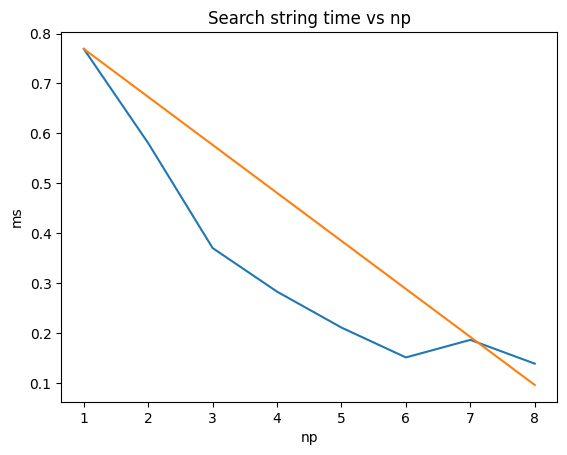

In [19]:
import matplotlib.pyplot as plt

nps = [1, 2, 3, 4, 5, 6, 7, 8]
# Times as read from an example run
times = [0.7692, 0.5804, 0.3703, 0.283, 0.211, 0.1512, 0.1864, 0.1388]

plt.title("Search string time vs np")
plt.plot(nps, times, [1, 8], [times[0], times[0]/8])
plt.ylabel('ms')
plt.xlabel('np')
plt.show()